In [1]:
# import dependecies 
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv

## Evaluate Data from 2009-2019
- Gini coefficient (proportion of income / total population)
- Summarize the GDP (CPI) / per capita of the countries OECD
    - updated to be CPI, GDP is being used in different analysis?

In [2]:
# read csv
file_path=os.path.join('Income_Distribution_OECD_013021.csv')
df=pd.read_csv(file_path)
#df.head()

/Users/triciaharris/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#df.count()

In [4]:
# clean dataframe so years < 2009 are removed

In [5]:
cleaned_years_df = df.query('Year > 2008')
cleaned_years_df

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,3.260000e-01,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,3.370000e-01,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,3.300000e-01,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,3.250000e-01,NaN,NaN
6,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2010,0_TO_1,0-1 scale,0,Units,NaN,NaN,3.340000e-01,NaN,NaN
7,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,3.240000e-01,NaN,NaN
8,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,IDX,Index,0,Units,NaN,NaN,1.051249e+02,NaN,NaN
9,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,IDX,Index,0,Units,NaN,NaN,1.103798e+02,NaN,NaN
10,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,IDX,Index,0,Units,NaN,NaN,1.134756e+02,NaN,NaN
11,AUS,Australia,CPI2010,Consumer Price Index (base 2010=100),TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,IDX,Index,0,Units,NaN,NaN,1.178981e+02,NaN,NaN


In [6]:
cleaned_years_df.count()

LOCATION                 45385
Country                  45385
MEASURE                  45385
Measure                  45385
AGE                      45385
Age group                45385
DEFINITION               45385
Definition               45385
METHODO                  45385
Methodology              45385
TIME                     45385
Year                     45385
Unit Code                45335
Unit                     45335
PowerCode Code           45385
PowerCode                45385
Reference Period Code        0
Reference Period             0
Value                    45385
Flag Codes                 339
Flags                      339
dtype: int64

In [7]:
cleaned_years_df.dtypes

LOCATION                  object
Country                   object
MEASURE                   object
Measure                   object
AGE                       object
Age group                 object
DEFINITION                object
Definition                object
METHODO                   object
Methodology               object
TIME                       int64
Year                       int64
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

In [8]:
cleaned_years_df.head()

,LOCATION,Country,MEASURE,Measure,AGE,Age group,DEFINITION,Definition,METHODO,Methodology,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2012,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.326,NaN,NaN
1,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2014,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.337,NaN,NaN
2,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2016,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.330,NaN,NaN
3,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2012,New income definition since 2012,...,2018,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.325,NaN,NaN
6,AUS,Australia,GINI,"Gini (disposable income, post taxes and transf...",TOT,Total population,CURRENT,Current definition,METH2011,Income definition until 2011,...,2010,0_TO_1,0-1 scale,0,Units,NaN,NaN,0.334,NaN,NaN


In [9]:
cleaned_years_df.drop(cleaned_years_df.columns[[0, 3, 4, 6, 7, 8, 9, 10, 14, 15, 16, 17, 19, 20]], axis = 1, inplace = True)

/Users/triciaharris/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
cleaned_years_df

,Country,MEASURE,Age group,Year,Unit Code,Unit,Value
0,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,3.260000e-01
1,Australia,GINI,Total population,2014,0_TO_1,0-1 scale,3.370000e-01
2,Australia,GINI,Total population,2016,0_TO_1,0-1 scale,3.300000e-01
3,Australia,GINI,Total population,2018,0_TO_1,0-1 scale,3.250000e-01
6,Australia,GINI,Total population,2010,0_TO_1,0-1 scale,3.340000e-01
7,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,3.240000e-01
8,Australia,CPI2010,Total population,2012,IDX,Index,1.051249e+02
9,Australia,CPI2010,Total population,2014,IDX,Index,1.103798e+02
10,Australia,CPI2010,Total population,2016,IDX,Index,1.134756e+02
11,Australia,CPI2010,Total population,2018,IDX,Index,1.178981e+02


In [11]:
gini_cpi = cleaned_years_df[cleaned_years_df["MEASURE"].isin(["GINI","CPI2010", "CPI2015"])]

In [12]:
gini_cpi.count()

Country      3906
MEASURE      3906
Age group    3906
Year         3906
Unit Code    3906
Unit         3906
Value        3906
dtype: int64

In [13]:
gini_cpi

,Country,MEASURE,Age group,Year,Unit Code,Unit,Value
0,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,0.326000
1,Australia,GINI,Total population,2014,0_TO_1,0-1 scale,0.337000
2,Australia,GINI,Total population,2016,0_TO_1,0-1 scale,0.330000
3,Australia,GINI,Total population,2018,0_TO_1,0-1 scale,0.325000
6,Australia,GINI,Total population,2010,0_TO_1,0-1 scale,0.334000
7,Australia,GINI,Total population,2012,0_TO_1,0-1 scale,0.324000
8,Australia,CPI2010,Total population,2012,IDX,Index,105.124871
9,Australia,CPI2010,Total population,2014,IDX,Index,110.379814
10,Australia,CPI2010,Total population,2016,IDX,Index,113.475554
11,Australia,CPI2010,Total population,2018,IDX,Index,117.898072


In [14]:
#export to csv 
gini_cpi.to_csv('gini_cpi.csv', header=True, index=True)

In [15]:
# read csv - from Simon - assess CPI
file_path=os.path.join('data_working.csv')
working_df=pd.read_csv(file_path)
working_df.head()

,Unnamed: 0,Country,Year,Union %,Gini,CPI
0,0,Hungary,2009,11.9,0.245,95.369304
1,1,Hungary,2015,9.0,0.291,111.384411
2,2,Poland,2009,16.3,0.305,97.484226
3,3,Poland,2010,18.3,0.307,100.000000
4,4,Poland,2011,17.0,0.304,104.239401


In [16]:
cleaned=working_df.drop("Unnamed: 0", axis=1)

In [17]:
cleaned.head()

,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401


In [18]:
cleaned.describe()

,Year,Union %,Gini,CPI
count,274.000000,274.000000,274.000000,274.000000
mean,2013.178832,27.405839,0.306745,106.253553
std,2.753777,21.074236,0.047903,6.242617
min,2009.000000,4.300000,0.233000,94.879602
25%,2011.000000,12.700000,0.268250,101.143633
50%,2013.000000,18.350000,0.299000,106.295550
75%,2015.750000,33.450000,0.335000,109.106306
max,2018.000000,91.000000,0.514000,146.067818


In [19]:
# put countries into groups
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 'Greece', 'Israel'
                 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [20]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [21]:
# cleaned[cleaned["Country"] == west_df["Country"]]

west_filter = pd.merge(cleaned, west_df, on=["Country"])
east_filter = pd.merge(cleaned, east_df, on=["Country"])
scand_filter = pd.merge(cleaned, scand_df, on=["Country"])
us_filter = pd.merge(cleaned, us_df, on=["Country"])
asia_filter = pd.merge(cleaned, asia_df, on=["Country"])
latin_filter = pd.merge(cleaned, latin_df, on=["Country"])

df = {
    "west": {"df": west_filter, "x":0, "y":0},
    "east": {"df": east_filter, "x":0, "y":1},
    "scand": {"df":scand_filter, "x":1, "y":0},
    "us": {"df":us_filter, "x":1, "y":1},
    "asia": {"df":asia_filter, "x":2, "y":0},
    "latin": {"df":latin_filter, "x":2, "y":1}
}

In [22]:
cleaned.head()

,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401


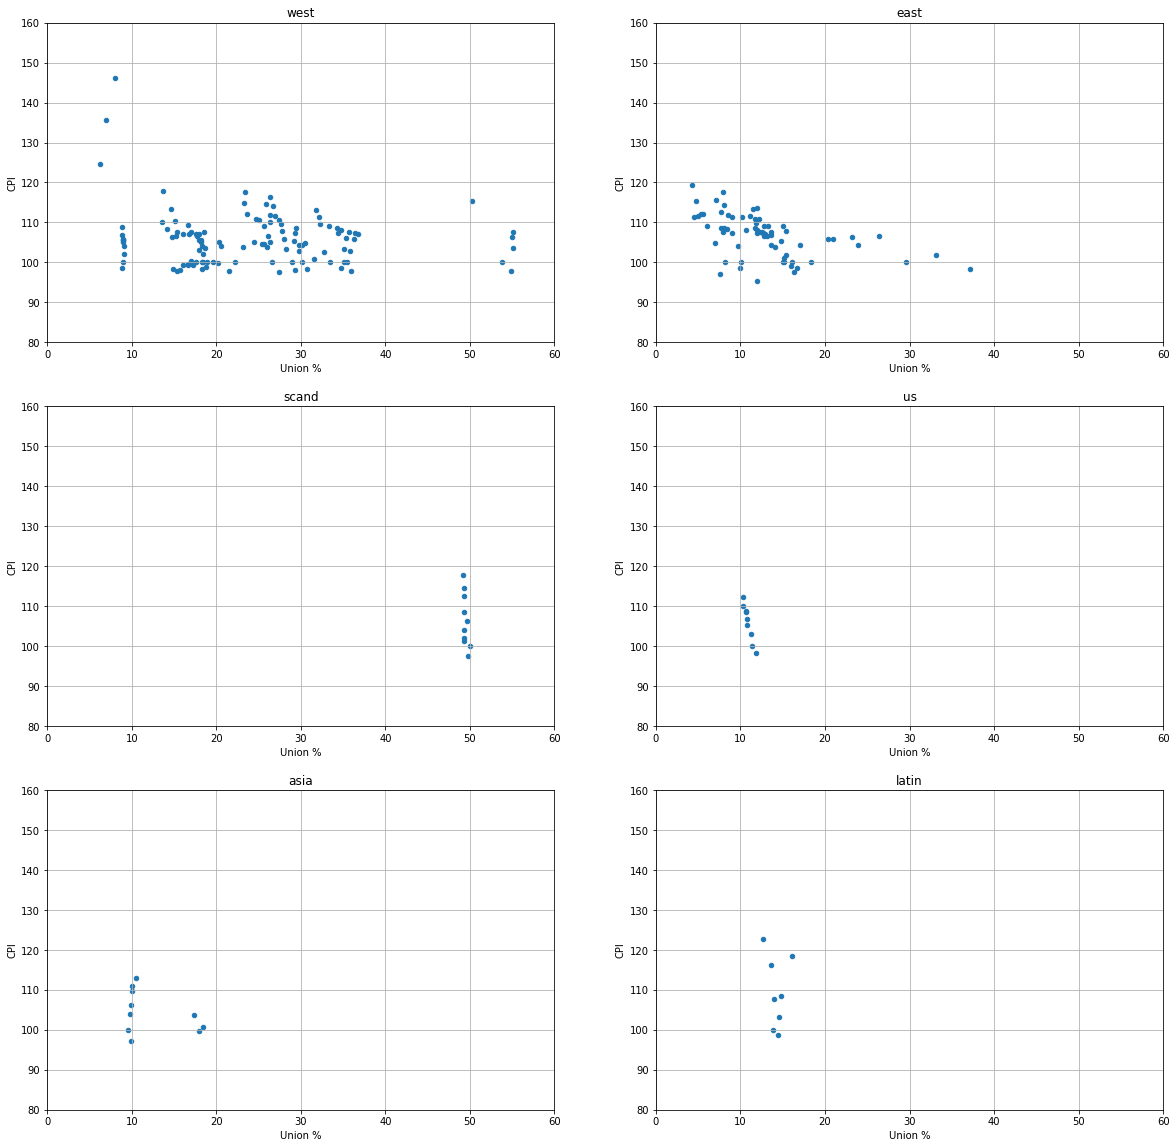

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for region in df:
    x_position=df[region]["x"]
    y_position=df[region]["y"]
    df[region]["df"].plot.scatter(x="Union %", y="CPI", ax=ax[x_position][y_position], grid=True)
    ax[x_position][y_position].set_title(region)
    ax[x_position][y_position].set_ylim(80, 160)
    ax[x_position][y_position].set_xlim(0, 60)

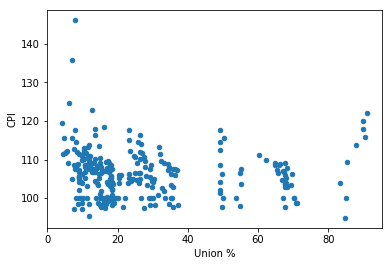

In [24]:
# Union % vs CPI - make larger and add regress
cleaned.plot.scatter(x="Union %", y="CPI")


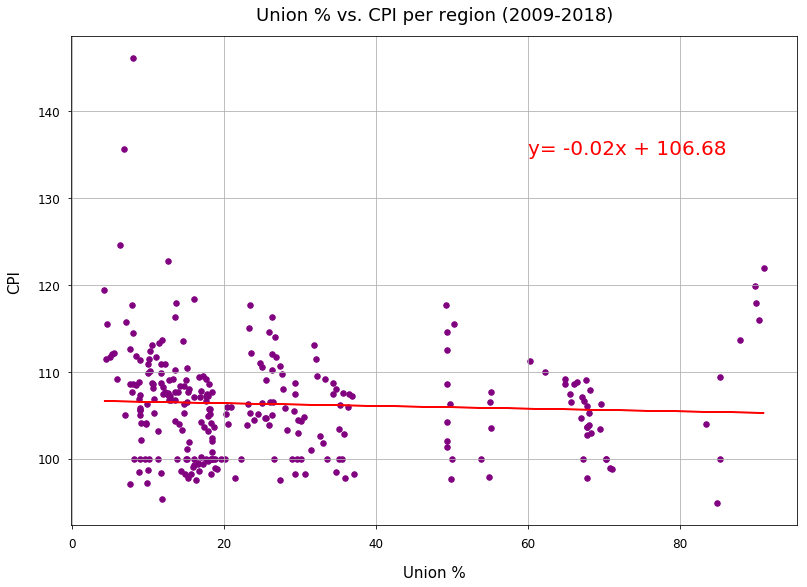

In [56]:
x_values=cleaned['Union %']
y_values=cleaned['CPI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(13,9))
plt.scatter(x_values, y_values, marker="o", c="purple", s=30)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(60,135), fontsize=20, color='red')
plt.title("Union % vs. CPI per region (2009-2018)", fontsize=18, y=1.02)
plt.ylabel("CPI", fontsize=15, labelpad=15)
plt.xlabel("Union %", fontsize=15, labelpad=15)
plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('Union_CPI_Scatter.png')

### Attempts to get dots different color - didn't work

In [25]:
# cleaned["Group"] = ""
# cleaned.head()

In [26]:
# for index, row in cleaned.iterrows():
#     if row["Country"] in west: 
#         cleaned.loc[index,"Group"] = 1
#     if row["Country"] in east: 
#         cleaned.loc[index,"Group"] = 2 
#     if row["Country"] in scandinavian: 
#         cleaned.loc[index,"Group"] = 3
#     if row["Country"] in us: 
#         cleaned.loc[index,"Group"] = 4
#     if row["Country"] in asia: 
#         cleaned.loc[index,"Group"] = 5 
#     if row["Country"] in latin: 
#         cleaned.loc[index,"Group"] = 6
# cleaned.head()

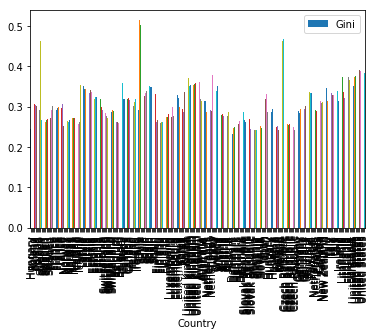

In [27]:
cleaned.plot.bar(x="Country", y="Gini")

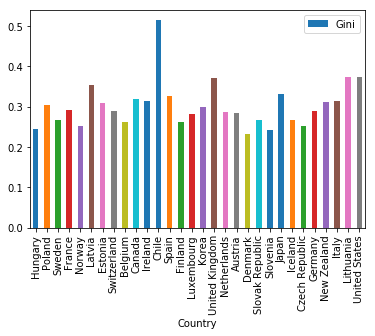

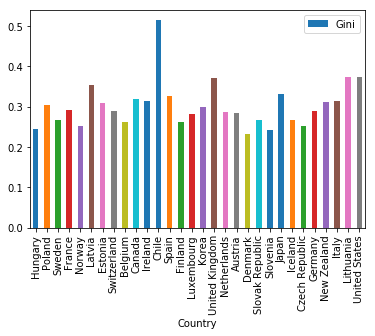

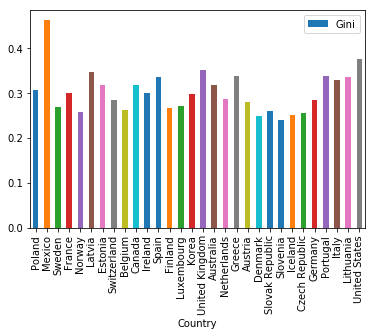

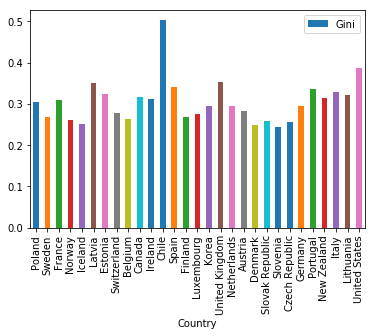

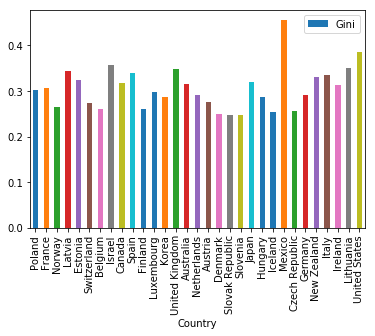

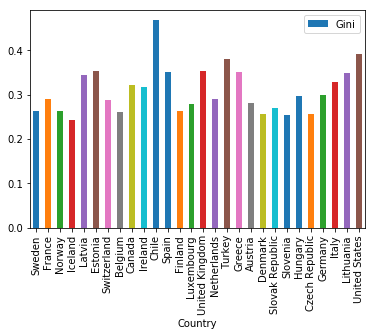

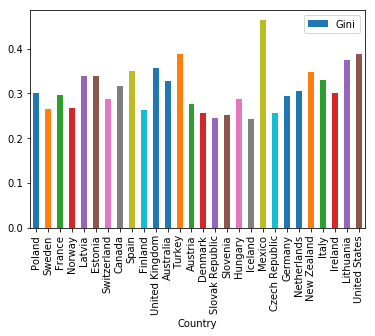

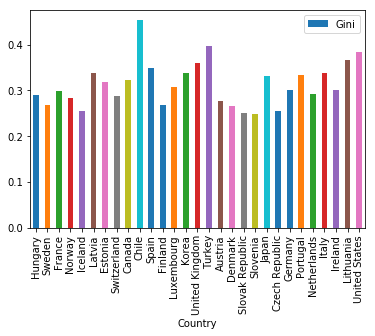

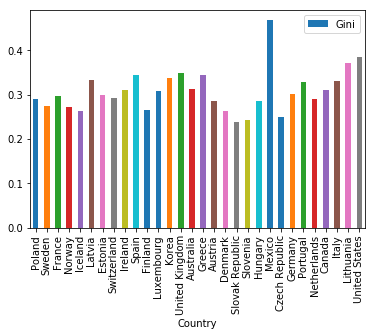

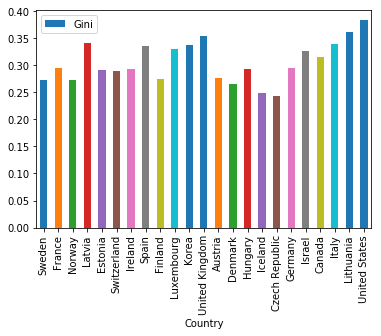

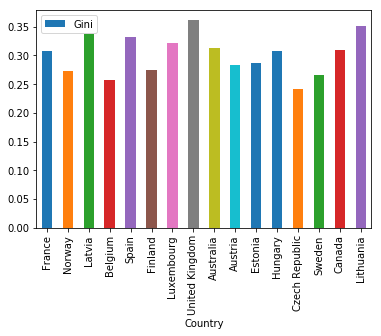

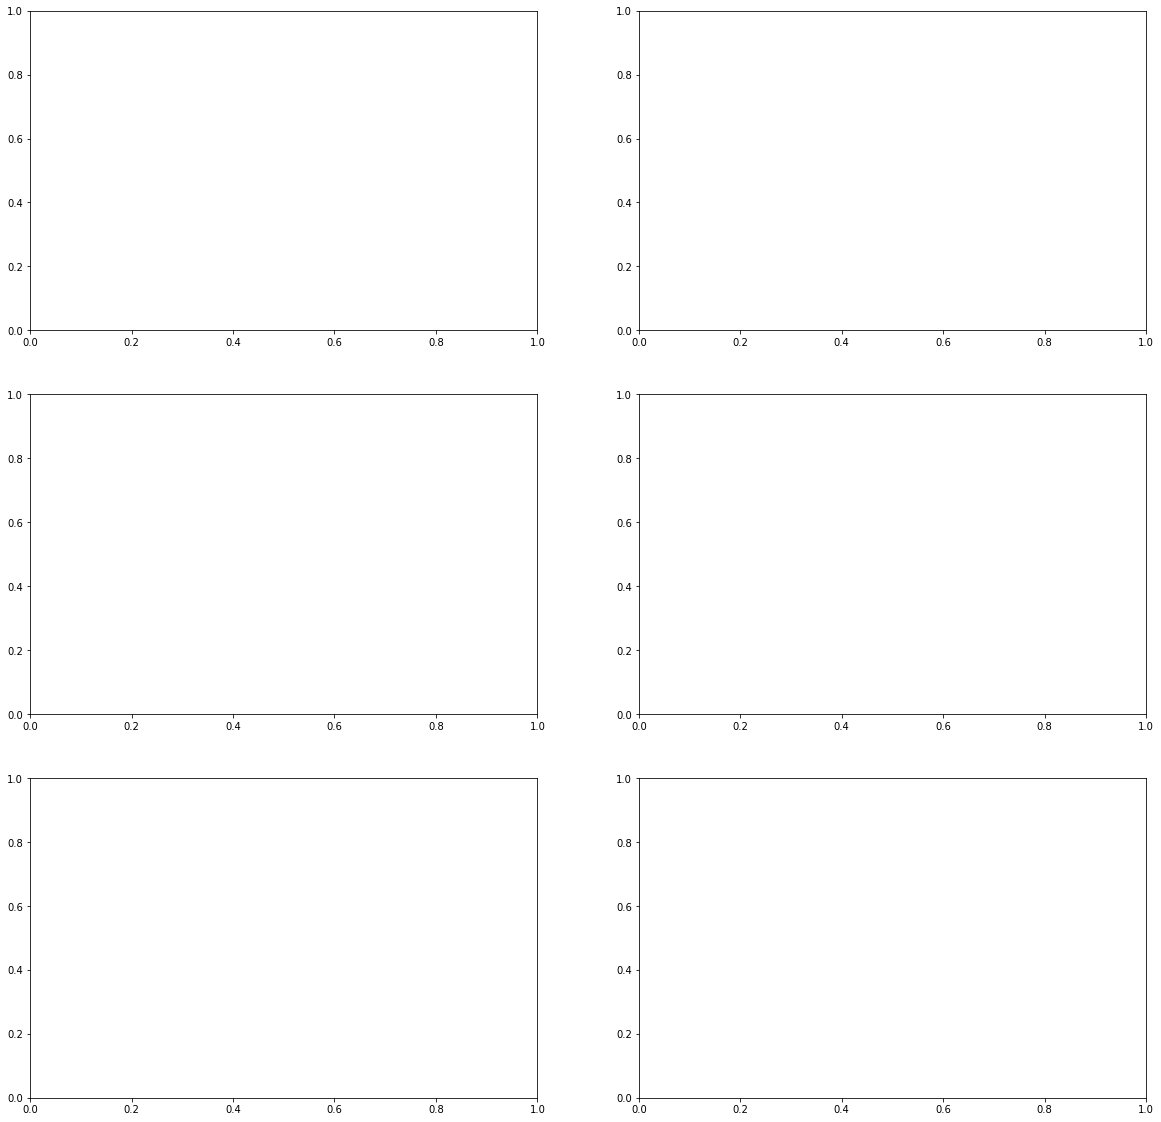

In [28]:
per_country = cleaned.groupby(["Year"])
per_country.plot.bar (x='Country', y='Gini')
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

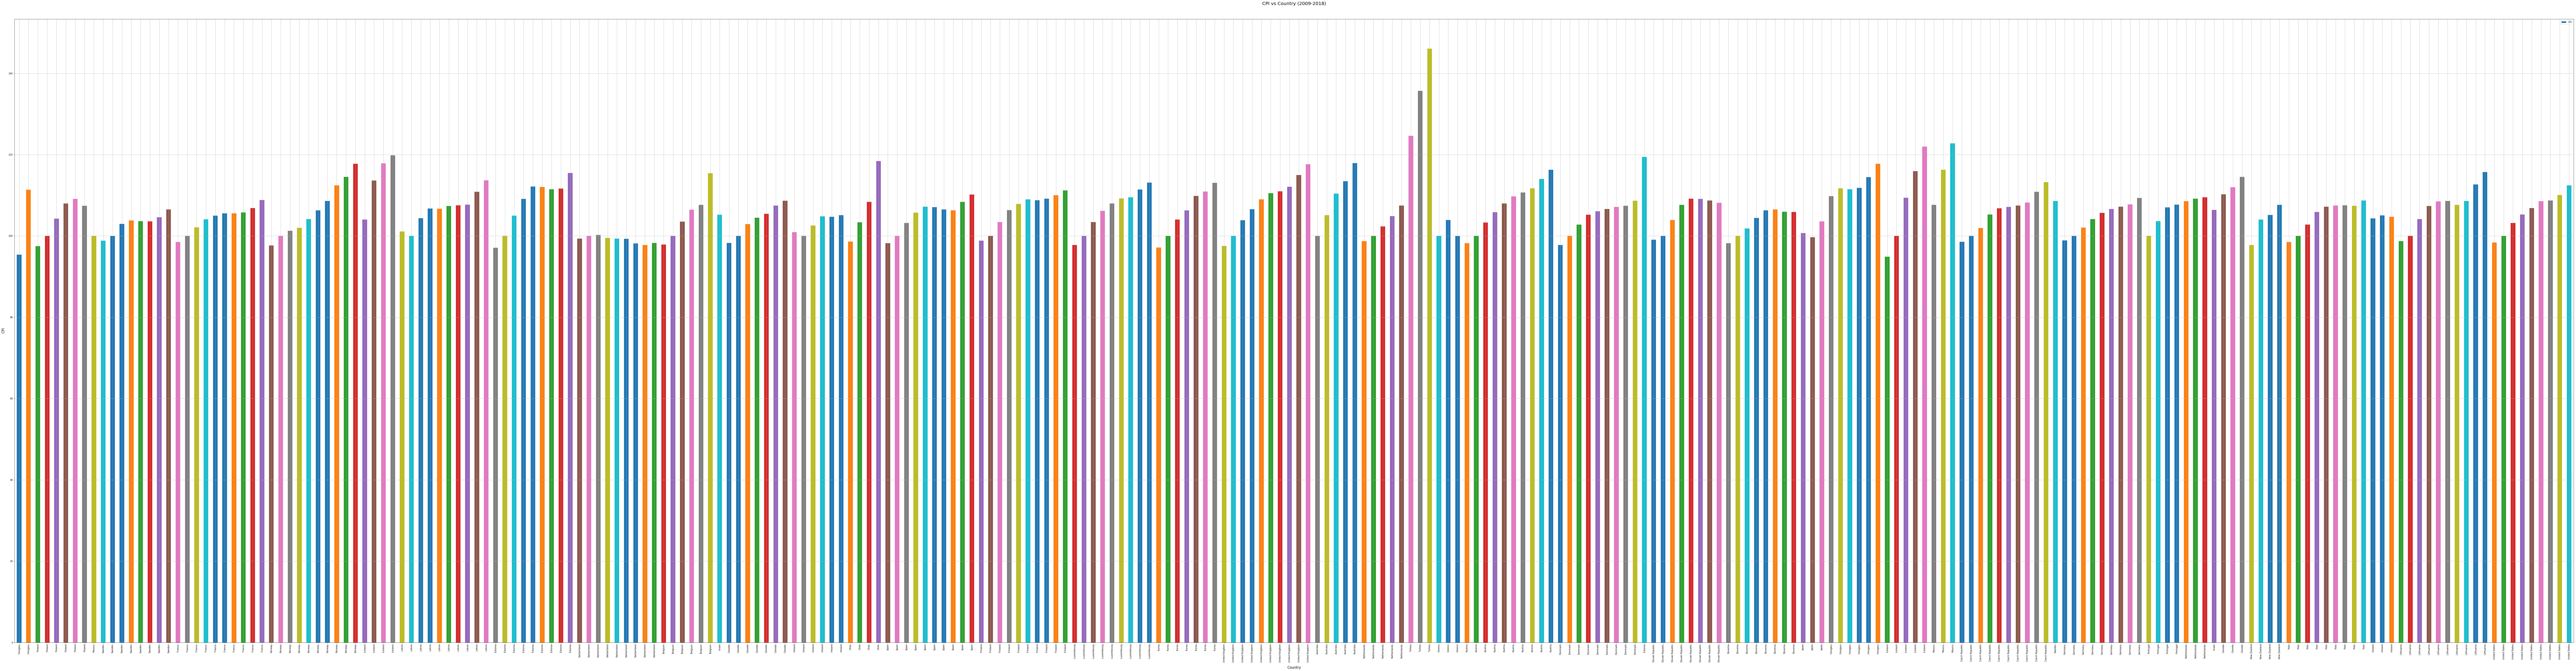

In [55]:
#Country and CPI
#plt.figure(figsize=(40,15))
cleaned.plot.bar(x="Country", y="CPI", figsize=(200,50))
plt.title("CPI vs Country (2009-2018)",fontsize=20, y=1.02)
plt.ylabel("CPI", fontsize=15, labelpad=15)
plt.xlabel("Country", fontsize=15, labelpad=15)
#plt.tick_params(labelsize=12, pad=8)
plt.grid(True)

# Save figure to .png
plt.savefig('CountryvsCPI.png')

In [1]:
per_country = cleaned.groupby(["Year"])
per_country.plot.bar (x='Country', y='CPI')

NameError: name 'cleaned' is not defined